<a href="https://colab.research.google.com/github/mehan05/number_predection/blob/main/number_Predection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8651 - loss: 0.4632 - val_accuracy: 0.9554 - val_loss: 0.1510
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9652 - loss: 0.1155 - val_accuracy: 0.9668 - val_loss: 0.1098
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9773 - loss: 0.0746 - val_accuracy: 0.9719 - val_loss: 0.0947
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9818 - loss: 0.0561 - val_accuracy: 0.9734 - val_loss: 0.0942
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9878 - loss: 0.0395 - val_accuracy: 0.9684 - val_loss: 0.1151
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9901 - loss: 0.0322 - val_accuracy: 0.9732 - val_loss: 0.1004
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9901 - loss: 0.0299 - val_accuracy: 0.9768 - val_loss: 0.0883
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9925 - loss: 0.0232

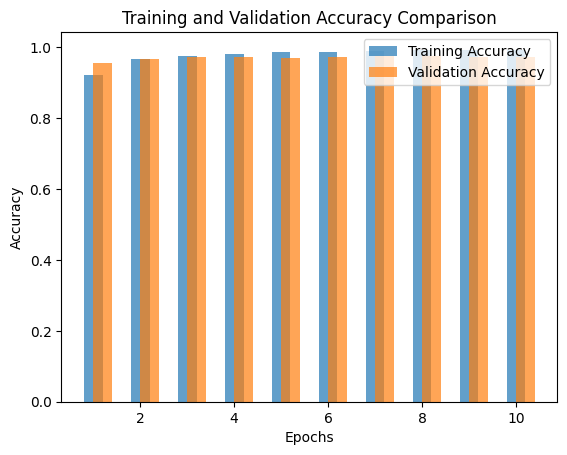

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predictions for the first 5 test samples:
[7 2 1 0 4]


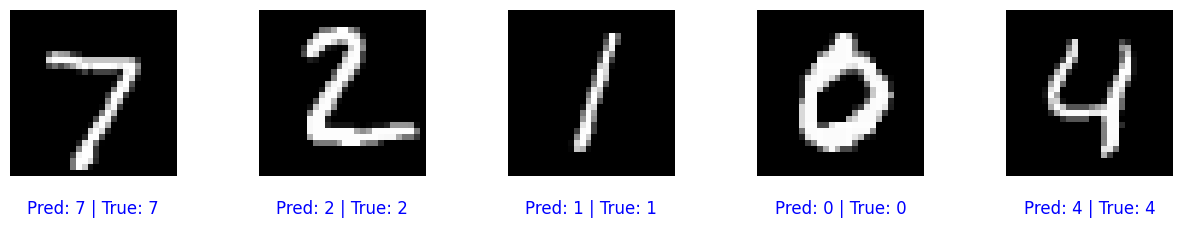

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

train_data = pd.read_csv('mnist_train.csv')
test_data = pd.read_csv('mnist_test.csv')

x_train = train_data.iloc[:, 1:].values
y_train = train_data.iloc[:, 0].values

x_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values

x_train = x_train / 255.0
x_test = x_test / 255.0

if x_train.shape[1] == 783:
    x_train = np.column_stack([x_train, np.zeros(x_train.shape[0])])

if x_test.shape[1] == 783:
    x_test = np.column_stack([x_test, np.zeros(x_test.shape[0])])

x_train = x_train.reshape(-1, 28, 28)
x_test = x_test.reshape(-1, 28, 28)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

epochs = range(1, 11)

plt.bar(epochs, history.history['accuracy'], width=0.4, align='center', label='Training Accuracy', alpha=0.7)
plt.bar(epochs, history.history['val_accuracy'], width=0.4, align='edge', label='Validation Accuracy', alpha=0.7)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Comparison')
plt.legend()
plt.show()

predictions = model.predict(x_test[:5])
print("Predictions for the first 5 test samples:")
print(predictions.argmax(axis=1))

fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    axes[i].imshow(x_test[i], cmap='gray')
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

for i in range(5):
    predicted_label = predictions[i].argmax()
    true_label = y_test[i].argmax()
    axes[i].text(0.5, -0.2, f"Pred: {predicted_label} | True: {true_label}",
                 ha='center', va='center', transform=axes[i].transAxes, fontsize=12, color='blue')

plt.show()
